In [1]:
%matplotlib inline
#%matplotlib notebook
#%matplotlib nbagg
import numpy as np
import matplotlib.pylab as plt
import yt
import h5py
from yt.data_objects.particle_filters import add_particle_filter
from yt.analysis_modules.halo_analysis.halo_catalog import HaloCatalog
from matplotlib.colors import LogNorm
from iminuit import Minuit, describe, Struct
import warnings
warnings.filterwarnings('ignore')


In [2]:
import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

In [3]:
#fn = "/data/TMP-outputs/output_00041/info_00041.txt"
fn = "/data/ISAPP_gadget/snapshot_006"
#fn = "/home/arturo/works/Gadget-2.0.7/Gadget2/lcdm_gas/snapshot_005"
# load data
ds = yt.load(fn)
ad = ds.all_data()

yt : [INFO     ] 2017-07-04 11:13:34,534 Calculating time from 1.000e+00 to be 4.356e+17 seconds
yt : [INFO     ] 2017-07-04 11:13:34,535 Assuming length units are in kpc/h (comoving)
yt : [INFO     ] 2017-07-04 11:13:34,570 Parameters: current_time              = 4.35581052821e+17 s
yt : [INFO     ] 2017-07-04 11:13:34,570 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-07-04 11:13:34,572 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-07-04 11:13:34,573 Parameters: domain_right_edge         = [ 25000.  25000.  25000.]
yt : [INFO     ] 2017-07-04 11:13:34,575 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-07-04 11:13:34,575 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-07-04 11:13:34,576 Parameters: omega_lambda              = 0.6911
yt : [INFO     ] 2017-07-04 11:13:34,577 Parameters: omega_matter              = 0.3089
yt : [INFO     ] 2017-07-04 11:13:34,578 Parameters: hubble_constant           =

In [127]:
# DO ONLY RUN IF YOU WANT TO START HALO FINDER
# finding halos 
hc = HaloCatalog(data_ds=ds, finder_method='hop') #fof
hc.create()


yt : [WARNING  ] 2017-07-03 18:48:26,571 dm_only is deprecated.  Use ptype to specify a particle type, instead.
yt : [WARNING  ] 2017-07-03 18:48:26,571 No particle_type, no creation_time, so not distinguishing.
yt : [INFO     ] 2017-07-03 18:48:27,929 Initializing HOP
yt : [WARNING  ] 2017-07-03 18:48:27,930 No particle_type, no creation_time, so not distinguishing.
yt : [INFO     ] 2017-07-03 18:53:49,283 Parsing outputs
yt : [INFO     ] 2017-07-03 19:06:14,718 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-07-03 19:06:14,721 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-07-03 19:06:14,723 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-07-03 19:06:14,726 Parameters: domain_right_edge         = [  1.13879450e+26   1.13879450e+26   1.13879450e+26]
yt : [INFO     ] 2017-07-03 19:06:14,728 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2017-07-03 19:06:14,733 Allocating for 1.032e+04 particles (index pa

In [4]:
#p = yt.ParticlePlot(ds, ('max_res_dark_matter','particle_position_x'), ('max_res_dark_matter','particle_position_y'))
#p = yt.ParticlePlot(ds, 'particle_position_x','particle_position_y')
#p = yt.ProjectionPlot(ds,'z','density')
#p.annotate_halos(hc, annotate_field = 'particle_identifier', width=(10,'Mpc'), factor=2)

In [6]:
#hc.save_catalog()



In [43]:
f = yt.load("Catalogs_rockstar_ISAPP/rockstar_halos/halos_0.0.bin")#"halo_catalogs_G_fof/catalog/catalog.0.h5")

yt : [INFO     ] 2017-07-04 12:19:08,813 Parameters: current_time              = 4.35581057888e+17 s
yt : [INFO     ] 2017-07-04 12:19:08,814 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2017-07-04 12:19:08,815 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-07-04 12:19:08,816 Parameters: domain_right_edge         = [ 25.  25.  25.]
yt : [INFO     ] 2017-07-04 12:19:08,817 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-07-04 12:19:08,818 Parameters: current_redshift          = 0.0
yt : [INFO     ] 2017-07-04 12:19:08,819 Parameters: omega_lambda              = 0.691100001335
yt : [INFO     ] 2017-07-04 12:19:08,820 Parameters: omega_matter              = 0.308899998665
yt : [INFO     ] 2017-07-04 12:19:08,820 Parameters: hubble_constant           = 0.677399992943


In [44]:
f.field_list

yt : [INFO     ] 2017-07-04 12:19:10,547 Allocating for 2.764e+04 particles (index particle type 'all')
yt : [INFO     ] 2017-07-04 12:19:10,565 Identified 8.249e+03 octs


[('all', 'A2x'),
 ('all', 'A2y'),
 ('all', 'A2z'),
 ('all', 'Ax'),
 ('all', 'Ay'),
 ('all', 'Az'),
 ('all', 'Jx'),
 ('all', 'Jy'),
 ('all', 'Jz'),
 ('all', 'Voff'),
 ('all', 'Xoff'),
 ('all', 'alt_m1'),
 ('all', 'alt_m2'),
 ('all', 'alt_m3'),
 ('all', 'alt_m4'),
 ('all', 'b_to_a'),
 ('all', 'b_to_a2'),
 ('all', 'bullock_spin'),
 ('all', 'c_to_a'),
 ('all', 'c_to_a2'),
 ('all', 'child_r'),
 ('all', 'desc'),
 ('all', 'energy'),
 ('all', 'flags'),
 ('all', 'kin_to_pot'),
 ('all', 'klypin_rs'),
 ('all', 'm_pe_b'),
 ('all', 'm_pe_d'),
 ('all', 'mgrav'),
 ('all', 'min_bulkvel_err'),
 ('all', 'min_pos_err'),
 ('all', 'min_vel_err'),
 ('all', 'n_core'),
 ('all', 'num_child_particles'),
 ('all', 'num_p'),
 ('all', 'p_start'),
 ('all', 'particle_bulkvel_x'),
 ('all', 'particle_bulkvel_y'),
 ('all', 'particle_bulkvel_z'),
 ('all', 'particle_corevel_x'),
 ('all', 'particle_corevel_y'),
 ('all', 'particle_corevel_z'),
 ('all', 'particle_identifier'),
 ('all', 'particle_mass'),
 ('all', 'particle_po

In [45]:
par_x = np.array(ad['particle_position_x'].in_units('pc'),dtype=np.float64)
par_y = np.array(ad['particle_position_y'].in_units('pc'),dtype=np.float64)
par_z = np.array(ad['particle_position_z'].in_units('pc'),dtype=np.float64)
par_mass = np.array(ad['particle_mass'].in_units('Msun'),dtype=np.float64)

In [46]:
bin_num = 80
xedges = np.linspace(par_x.min(),par_x.max(),bin_num)
yedges = np.linspace(par_y.min(),par_y.max(),bin_num)
lim = 2e6
low_lim, up_lim = 3e7,4e7

par_con = (par_z>low_lim)&(par_z<up_lim)

# Sort out Particles
H, xedges, yedges = np.histogram2d(par_x[par_con], par_y[par_con], bins=(xedges, yedges),weights=par_mass[par_con])
H = H.T

# Sort out halos
halos_data = f.all_data()
halos_x = np.array(halos_data['halos', u'particle_position_x'].in_units('pc'),dtype=np.float64)
halos_y = np.array(halos_data['halos', u'particle_position_y'].in_units('pc'),dtype=np.float64)
halos_z = np.array(halos_data['halos', u'particle_position_z'].in_units('pc'),dtype=np.float64)
halos_r = np.array(halos_data['halos', u'virial_radius'].in_units('pc'),dtype=np.float64)
halos_mass = np.array(halos_data['halos', u'particle_mass'].in_units('Msun'),dtype=np.float64)


# Sort out all halos which are more near than 2r than the box boundary
# generically find out box size
a = np.array([par_x, par_y, par_z]).max()
# indices of halos in the box
halos_cond = np.where( ((a-2*halos_r) > halos_x) & ((2*halos_r) < halos_x) & \
                       ((a-2*halos_r) > halos_y) & ((2*halos_r) < halos_y) & \
                       ((a-2*halos_r) > halos_z) & ((2*halos_r) < halos_z) & \
                       (halos_mass > 100*par_mass[0])
                     )
# sort out
halos_x    = halos_x[halos_cond]
halos_y    = halos_y[halos_cond]
halos_z    = halos_z[halos_cond]
halos_r    = halos_r[halos_cond]
halos_mass = halos_mass[halos_cond]

print(halos_mass)

[  1.20335136e+11   1.52251652e+12   1.36717697e+10 ...,   1.23753084e+10
   1.22574479e+10   1.20217284e+10]


Choose the right from below

In [47]:
halos_mass_hop = halos_mass
halos_r_hop = halos_r

In [48]:
halos_mass_fof = halos_mass
halos_r_fof = halos_r

In [49]:
halos_mass_rock = halos_mass
halos_r_rock = halos_r

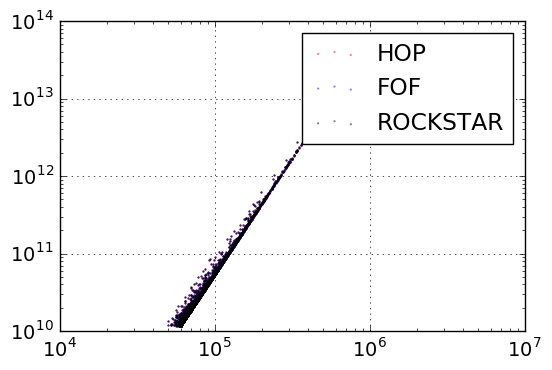

In [50]:
# Histogram halos
plt.scatter(halos_r_hop, halos_mass_hop, s=0.3, alpha=0.5, color='red', label='HOP')
plt.scatter(halos_r_fof, halos_mass_fof, s=0.3, alpha=0.5, color='blue', label='FOF')
plt.scatter(halos_r_rock, halos_mass_rock, s=0.3, alpha=0.5, color='k', label='ROCKSTAR')
plt.yscale('log')
plt.xscale('log')
plt.grid()
plt.legend(loc='best')

In [51]:
# A slice
halos_con = np.where((halos_z>low_lim)&(halos_z<up_lim))
halos_x_f = halos_x[halos_con]
halos_y_f = halos_y[halos_con]
halos_r_f = halos_r[halos_con]

In [52]:
H.max()

19994608521680.734

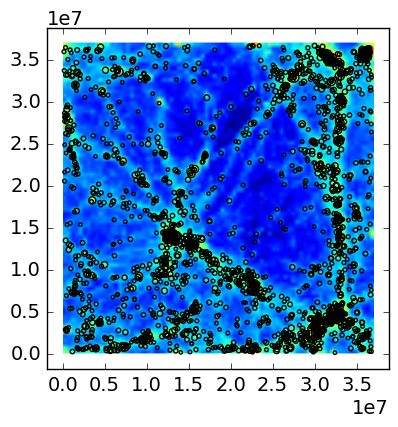

In [53]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(131)
ax.imshow(H, interpolation='bilinear', origin='low',
         extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
          norm=LogNorm(vmin=H.min(), vmax=H.max()))
ax.scatter(halos_x_f,halos_y_f,s=100*halos_r_f/halos_r_f.max(),
           facecolors='none')
#ax.scatter(halos_x,halos_y,marker='o', color='white')

In [54]:
print np.where((halos_r>=0.8*halos_r.max()))# & (halos_r<=0.2*halos_r.max())), np.where(halos_mass>=0.7*halos_mass.max())

(array([1829, 1881]),)


In [55]:
# Select a halo
i = 1829 #9862 #1829(biggest) #1881
print halos_x[i]

# Shift coordinates to halo center
x, y, z = np.copy(par_x),np.copy(par_y),np.copy(par_z)
print x
x, y, z = np.subtract(x,halos_x[i]), np.subtract(y, halos_y[i]),np.subtract(z, halos_z[i])
print x

# Calculate radii of particles and sort out all particles outside of halo radius
r = np.sqrt(x**2 + y**2 + z**2)
in_x, in_y, in_z, in_mass = x[(r<halos_r[i])], y[(r<halos_r[i])], z[(r<halos_r[i])], par_mass[(r<halos_r[i])] 
in_r = r[(r<halos_r[i])]#np.sqrt(in_x**2 + in_y**2 + in_z**2)

12785175.6718
[  83034.25183224   38781.78412069  248291.83104892 ...,  202758.76203187
  264854.69019585  158703.47993016]
[-12702141.41996948 -12746393.88768103 -12536883.8407528  ...,
 -12582416.90976985 -12520320.98160587 -12626472.19187157]


In [56]:
# Calculate the densitiy profile
R = np.logspace(np.log10(in_r.min()),np.log10(in_r.max()),50)
hist, bins = np.histogram(in_r,bins=R,weights=in_mass)
n,_ = np.histogram(in_r,bins=R)
n = n[1:]
volume = 4 * np.pi * (bins[2:]**3-bins[1:-1]**3) /3
rho = hist[1:] / volume

bins = bins[(rho>0)]
n = n[rho>0]
rho = rho[[(rho>0)]]
print len(bins), len(rho),len(n)

48 48 48


In [57]:
# calculating Power radius (arXiv:astro-ph/0201544)
Pcrit = 158.114774626 / 1e9 # Msun / kpc^3
Mdm = par_mass[0]

# sorting r
myradiuses = in_r[np.argsort(in_r)]
tabN = np.cumsum(np.ones(len(myradiuses)))[1:]
myradiuses = myradiuses[1:]
Rp03 = np.sqrt(200/64.) * np.sqrt(4 * np.pi * Pcrit * tabN / 3. / Mdm ) * (myradiuses**1.5)/ np.log(tabN) 
val =0.6
R_P03 = myradiuses[ np.where(Rp03 > val) ][0]
print R_P03

10070.6188465


In [58]:
def abg_profile(x,po,r_s,al,be,ga):
    power =  (be - ga) / al
    denominator = ((x/r_s)**ga) * ((1 + (x / r_s)**al)**power)
    return (10**po) / denominator

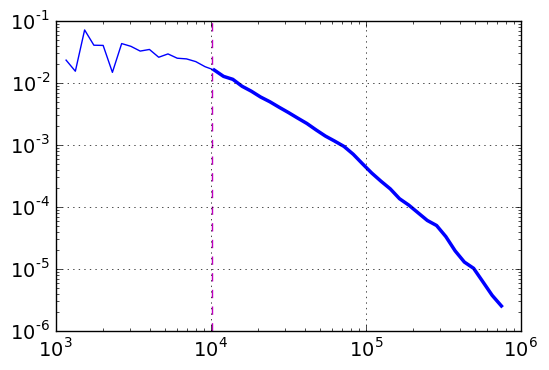

In [59]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlim([1e3,1e7])
#ax.set_ylim([1e27,1e32])

R=bins
#ax.axvline(x=epsilon,c='k',ls='--')
ax.axvline(x=R_P03,c='m',ls='--')
ax.plot(bins,rho)
ax.plot(bins[(bins>R_P03)],rho[(bins>R_P03)],lw=2.5,c='b')
y = np.array([1e29 for j in in_r])
plt.grid()

In [60]:
def chi2(po,r_s,al,be,ga):
    expected = abg_profile(bins,po,r_s,al,be,ga)
    observed = rho#[(bins>R_P03)]
    c = (np.log10((observed))- np.log10(expected))**2 #/ np.log10(n)#[(bins>R_P03)])
    #c = (observed- expected)**2 / (n[(bins>R_P03)])
    return np.nansum(c)

In [61]:
m = Minuit(chi2, 
         po=np.log10(rho[(bins>R_P03)].max()), error_po=0.01,     limit_po=(-30.,30.),
         r_s=0.03*halos_r[i],    error_r_s=0.1,     limit_r_s=(0.,2*halos_r[i]),
         al=1.,     error_al=0.1,    limit_al=(0,10),
         be=3,  error_be=0.1,   limit_be=(0,10),
         ga=1,  error_ga=0.1,   limit_ga=(0,10),
         print_level=0)
m.migrad();
m.values

{'al': 0.952480981299878,
 'be': 2.693078606203112,
 'ga': 0.00018376365493122382,
 'po': -1.3476792471882604,
 'r_s': 22404.37408763643}

In [62]:
print "{0:0.2e}".format(par_mass[0])

1.18e+08


22404.3740876 -1.34767924719
0.00149381785337


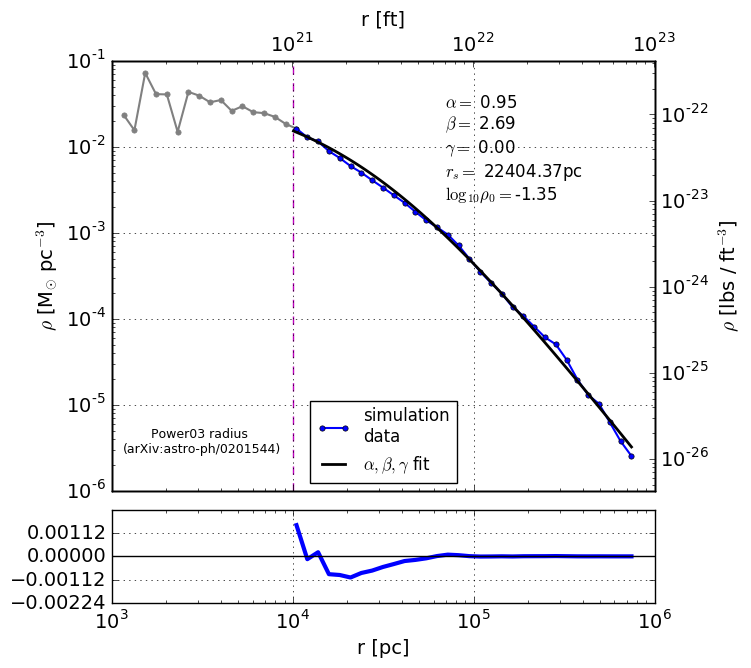

In [75]:
fig = plt.figure(figsize=[7,7])
ax = plt.subplot2grid((5,1), (0, 0),rowspan=4)
ax1 = plt.subplot2grid((5,1), (4, 0),rowspan=1,sharex=ax)
#fig.subplots_adjust(hspace='0.5em')
plt.setp([a.get_xticklabels() for a in fig.axes[:-1]], visible=False)
ax.set_ylabel(r'$\rho$ [M$_{\odot}$ pc$^{-3}$]',fontsize=14) 
ax1.set_xlabel(r'r [pc]',fontsize=14) 

ax.set_xscale('log')
ax.set_yscale('log')

# 
r_false = np.logspace(np.log10(R_P03),np.log10(bins[(bins>R_P03)].max()),100)
r_ini = np.logspace(np.log10(-3),np.log10(bins[(bins>R_P03)].max()),100)
#ax.plot(r_false,abg_profile(r_false,-2,4e4,1,3,0.1))

ax.plot(bins[(bins<R_P03*1.1)],rho[(bins<R_P03*1.1)],c='gray',linestyle='-',marker='o',ms=3.8,lw=1.5,markeredgecolor='gray')
ax.plot(bins[(bins>R_P03)],rho[(bins>R_P03)],'b-o',ms=3.8,lw=1.5,label="simulation\ndata")


texto = r"$\alpha = $ {0:.2f}".format(m.values['al']) + "\n"
texto += r"$\beta = $ {0:.2f}".format(m.values['be']) + "\n"
texto += r"$\gamma = $ {0:.2f}".format(m.values['ga']) + "\n"
texto += r"$r_s = $ {0:.2f}".format(m.values['r_s']) + "pc \n"
texto += r"$\log_{10} \rho_0 = $" + r"{0:.2f}".format(m.values['po'])
print m.values['r_s'],m.values['po']
fig.text(0.14,0.34,"       Power03 radius \n(arXiv:astro-ph/0201544)",fontsize=9)
fig.text(0.6,0.7,texto , fontsize=12)
#fig.text(R_P03*10,(10**m.values['po']),texto1)
#fig.text(R_P03*10,(10**m.values['po'])*0.6,texto2)
ax.plot(r_false,abg_profile(r_false,m.values['po'],m.values['r_s'],m.values['al'],m.values['be'],m.values['ga']),
        'k',lw=2,label=r'$\alpha,\beta,\gamma$ fit')
ax.axvline(x=R_P03,c='m',ls='--')
ax.grid()
#ax.plot(r_false,abg_profile(r_false,29,1e6,1,3,1))


#ax1.plot(bins,abg_profile(bins,m.values['po'],m.values['r_s'],m.values['al'],m.values['be'],m.values['ga']) - rho )
residuals = - abg_profile(bins[(bins>R_P03)],m.values['po'],m.values['r_s'],m.values['al'],m.values['be'],m.values['ga']) + rho[(bins>R_P03)]
limito = np.abs(residuals).max()
print limito
ax1.plot(bins[(bins>R_P03)],residuals,lw=3,c='b')
ax1.axhline(y=0,c='k',ls='-')
ax1.set_ylim([-limito*1.5,limito*1.5])
ax1.grid()
ax1.yaxis.set_ticks(np.arange(-limito*1.5,limito*1.5,limito*0.75))
msuntokg = 1.9891e30
kgtopound =2.2046226
pctofeet = 1.01236141e17 
axx = ax.twinx()
axx.set_yscale('log')
(ymin,ymax) = ax.get_ylim()
ymin *= par_mass[0]
ymax *= par_mass[0]
axx.set_ylim((1e-6*msuntokg*kgtopound / (pctofeet**3),1e-1*msuntokg*kgtopound / (pctofeet**3)))
axx.set_ylabel(r'$\rho$ [lbs / ft$^{-3}$]',fontsize=14)


axy = ax.twiny()
axy.set_xscale('log')
axy.set_xlim((1e3*pctofeet,1e6*pctofeet))
axy.set_xlabel(r'r [ft]',fontsize=14)


ax.set_xlim([1e3,1e6])
ax.set_ylim([1e-6,1e-1])


legend = ax.legend(loc='lower center', ncol=1, shadow=False, fontsize=12)
frame = legend.get_frame()


In [36]:
def fit_data(bins, rho, R_P03, NFW=False):
    def abg_profile(x,po,r_s,al,be,ga):
        power =  (be - ga) / al
        denominator = ((x/r_s)**ga) * ((1 + (x / r_s)**al)**power)
        return (10**po) / denominator
    def chi2(po,r_s,al,be,ga):
        expected = abg_profile(bins[(bins>R_P03)],po,r_s,al,be,ga)
        observed = rho[(bins>R_P03)]
        c = (np.log10((observed))- np.log10(expected))**2 #/ np.log10(n)#[(bins>R_P03)])
        #c = (observed- expected)**2 / (n[(bins>R_P03)])
        return np.nansum(c)
    a_lim, a_lim2 =0,10.1
    b_lim, b_lim2 =0,10.1
    if (NFW):
        a_lim, a_lim2 =0.9,1.1
        b_lim, b_lim2 =2.9,3.1
        
    m = Minuit(chi2, 
         po=np.log10(rho[(bins>R_P03)].max()), error_po=0.01,     limit_po=(-30.,30.),
         r_s=0.03*halos_r[i],    error_r_s=0.1,     limit_r_s=(0.,2*halos_r[i]),
         al=1.,     error_al=0.1,    limit_al=(a_lim,a_lim2),
         be=3,  error_be=0.1,   limit_be=(b_lim,b_lim2),
         ga=1.,  error_ga=0.1,   limit_ga=(a_lim,a_lim2),
         print_level=0)
    m.migrad();
    return m.values
    

In [37]:
def get_data(i):
    #print halos_r[i], i
    # Shift coordinates to halo center
    x, y, z = np.copy(par_x),np.copy(par_y),np.copy(par_z)
    x, y, z = np.subtract(x,halos_x[i]), np.subtract(y, halos_y[i]),np.subtract(z, halos_z[i])

    # Calculate radii of particles and sort out all particles outside of halo radius
    r = np.sqrt(x**2 + y**2 + z**2)
    in_x, in_y, in_z, in_mass = x[(r<halos_r[i])], y[(r<halos_r[i])], z[(r<halos_r[i])], par_mass[(r<halos_r[i])] 
    in_r = r[(r<halos_r[i])]#np.sqrt(in_x**2 + in_y**2 + in_z**2)
    
    # Calculate the densitiy profile
    R = np.logspace(np.log10(in_r.min()),np.log10(in_r.max()),50)
    hist, bins = np.histogram(in_r,bins=R,weights=in_mass)
    n,_ = np.histogram(in_r,bins=R)
    n = n[1:]
    volume = 4 * np.pi * (bins[2:]**3-bins[1:-1]**3) /3
    rho = hist[1:] / volume

    bins = bins[(rho>0)]
    n = n[rho>0]
    rho = rho[[(rho>0)]]
    
    # calculating Power radius (arXiv:astro-ph/0201544)
    Pcrit = 158.114774626 / 1e9 # Msun / kpc^3
    Mdm = par_mass[0]

    # sorting r
    myradiuses = in_r[np.argsort(in_r)]
    tabN = np.cumsum(np.ones(len(myradiuses)))[1:]
    myradiuses = myradiuses[1:]
    Rp03 = np.sqrt(200/64.) * np.sqrt(4 * np.pi * Pcrit * tabN / 3. / Mdm ) * (myradiuses**1.5)/ np.log(tabN) 
    val =0.6
    R_P03 = myradiuses[ np.where(Rp03 > val) ][0]
    #print R_P03
    
    return bins, rho, R_P03

In [38]:
def plot_halo_data(bins, rho, R_P03, ax):  
    #ax.axvline(x=R_P03,c='m',ls='--')
    ax.plot(bins[(bins<=R_P03)],rho[(bins<=R_P03)], alpha=0.3,c='gray',zorder=1)
    ax.plot(bins[(bins>R_P03)],rho[(bins>R_P03)],lw=1.5,c='b',alpha=0.5,zorder=8)

In [39]:
print len(halos_x)

4926


0
500
1000
1500
2000
2500
3000
3500
4000
4500


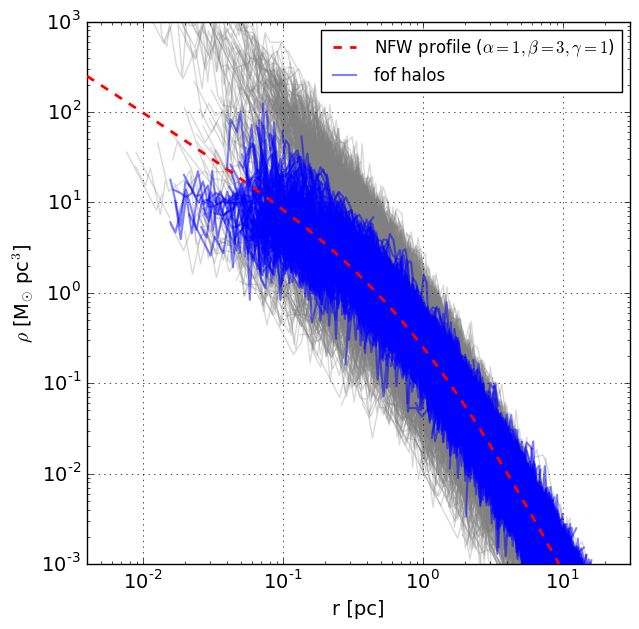

In [40]:
fig, ax1 = plt.subplots(figsize=[7,7])
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([4e-3,3e1])
ax1.set_ylim([1e-3,1e3])
r_NFW = np.logspace(-3,1,100)
#ax1.plot(r_NFW,abg_profile(r_NFW,0,1,1,3,1))
j=-1
for i in (np.argsort(halos_r)[::-1]):
    j += 1
    if j%500==0:
        print j
    bins, rho, R_P03  = get_data(i)
    mvals = fit_data(bins, rho, R_P03, NFW=True)
    # Rescale rho and bins
    bins /= mvals['r_s']
    R_P03 /= mvals['r_s']
    rho /= 10**mvals['po']
    plot_halo_data(bins, rho, R_P03, ax1)

    
ax1.plot(r_NFW,abg_profile(r_NFW,0,1,1,3,1),'r--',lw=2,zorder=10,
         label=r'NFW profile ($\alpha=1,\beta=3, \gamma=1$)')
ax1.grid()
ax1.plot([1000,10200],[1000,10200],lw=1.5,c='b',alpha=0.5,label='fof halos',zorder=10)
ax1.set_ylabel(r'$\rho$ [M$_{\odot}$ pc$^3$]',fontsize=14) 
ax1.set_xlabel(r'r [pc]',fontsize=14) 
legend = ax1.legend(loc='upper right', ncol=1, shadow=False, fontsize=12)
frame = legend.get_frame()
plt.savefig("superplot.png",dpi=300)

<Container object of 29 artists>

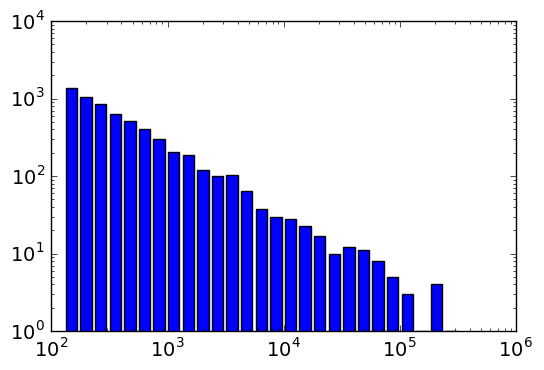

In [10]:
bins = np.logspace(np.log10(halos_mass.min()),np.log10(halos_mass.max()),30)
hist, bins = np.histogram(halos_mass,bins=bins)
width = bins[1:]-bins[:-1]
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

ax.bar(bins[1:]/par_mass[0],hist,width=width/par_mass[0])